# Project 4

In [6]:
%matplotlib inline 
import matplotlib
import itertools
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## 1. Load the dataset

In [7]:
# Read the .csv file to load the data
# You should change this line to load your dataset correctly
trff_all= pd.read_csv('network_backup_dataset.csv')

# Compute the day # of each data point
trff_all = trff_all.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}})
trff_all['Day #'] = (trff_all['Week #']-1)*7+trff_all['Day of Week']

# Choose the first twenty-day period
trff_20 = trff_all[trff_all['Day #']<=20]

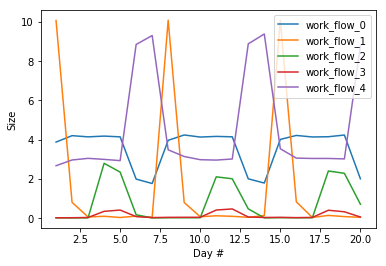

In [8]:
# (a)
# Compute sum of Size of Backup for each day and plot the result of each work flow
for Workflow, group in trff_20[['Work-Flow-ID','Day #', 'Size of Backup (GB)']].groupby('Work-Flow-ID'):
    size = list()
    day = list()
    for Day, Size in group.groupby('Day #'):
        size.append(sum(Size['Size of Backup (GB)']))
        day.append(Day)
    plt.plot(day, size, label = Workflow)
plt.xlabel('Day #')
plt.ylabel('Size')
plt.legend(loc = 'best')
plt.show()

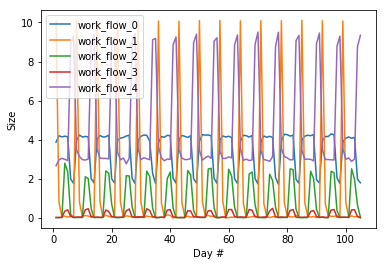

In [9]:
# (b)
# Choose the first 105-day period and plot the backup sizes
trff_105 = trff_all[trff_all['Day #']<=105]
for Workflow, group in trff_105[['Work-Flow-ID','Day #', 'Size of Backup (GB)']].groupby('Work-Flow-ID'):
    size = list()
    day = list()
    for Day, Size in group.groupby('Day #'):
        size.append(sum(Size['Size of Backup (GB)']))
        day.append(Day)
    plt.plot(day, size,label = Workflow)
plt.xlabel('Day #')
plt.ylabel('Size')
plt.legend(loc = 'best')
plt.show()

(c) Can you identify any repeating patterns? 
Both 20 days and 105 dyas data have a repeating pattern with period of 7 days.

## 2. Predict the backup size of a file given the other attributes

### a) Linear Regression

i) Plot fitted values against true values as scatter plots
ii) Plot residuals versus fitted values as scatter plots

In [12]:
# Apply the scalar encoding to the data
# You should change the the first line to load the dataset correctly
trff_all= pd.read_csv('/Users/yutongsun/Documents/2019WINTER_ECE219/project 4/network_backup_dataset.csv')
trff_scale_encode = trff_all.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                                                      'Friday': 5, 'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26,
                                'File_27': 27, 'File_28': 28, 'File_29': 29, }})

In [123]:
def drawScatterPlots(train_Y, predicted_Y, title):
    #Fitted values against true values
    fig, ax = plt.subplots()
    ax.scatter(x=train_Y, y= predicted_Y)
    ax.plot([train_Y.min(), train_Y.max()], [train_Y.min(), train_Y.max()],  'k--', lw=3)
    ax.set_xlabel('True values')
    ax.set_ylabel('Fitted values')
    plt.title(title)
    plt.show()

    #Residual against fitted values
    residual_Y = train_Y - predicted_Y
    fig, ax = plt.subplots()
    ax.scatter(predicted_Y, residual_Y)
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residual')
    plt.title(title)
    plt.show()

In [110]:
def plot_rmse_test_avg(rmse_testing_avg):
    plt.plot(range(1,len(rmse_testing_avg)+1), rmse_testing_avg, 'r', alpha = 0.4, label='test')
    plt.ylabel('Average Test RMSE')
    plt.xlabel('Combinations')
    plt.show()

def plot_rmse_training_avg(rmse_training_avg):
    plt.plot(range(1,len(rmse_training_avg)+1), rmse_training_avg, 'r', alpha = 0.4, label='training')
    plt.ylabel('Average Training RMSE')
    plt.xlabel('Combinations')
    plt.show()

In [111]:
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold

The Training RMSE is 0.1032
The Test RMSE is 0.1067
------------------------------
The Training RMSE is 0.1040
The Test RMSE is 0.1002
------------------------------
The Training RMSE is 0.1032
The Test RMSE is 0.1068
------------------------------
The Training RMSE is 0.1039
The Test RMSE is 0.1004
------------------------------
The Training RMSE is 0.1032
The Test RMSE is 0.1071
------------------------------
The Training RMSE is 0.1039
The Test RMSE is 0.1004
------------------------------
The Training RMSE is 0.1032
The Test RMSE is 0.1071
------------------------------
The Training RMSE is 0.1039
The Test RMSE is 0.1005
------------------------------
The Training RMSE is 0.1032
The Test RMSE is 0.1071
------------------------------
The Training RMSE is 0.1040
The Test RMSE is 0.0999
------------------------------


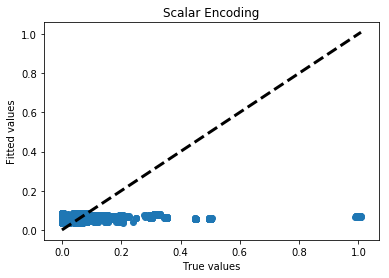

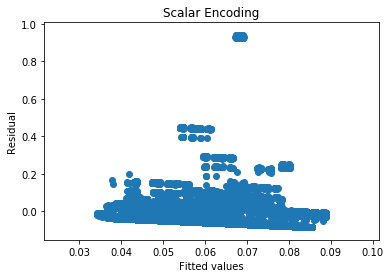

The average Training RMSE is 0.1036
The average Test RMSE is 0.1036


In [132]:
# Separate the data into the features and target
variables = trff_scale_encode[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
backup_size = trff_scale_encode['Size of Backup (GB)']
rmse_testing = list()
rmse_training = list()
actual_values = list()
fitted_values = list()
residuals = list()

# Use 10-fold cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in kf.split(trff_scale_encode):
    variables_train, variables_test = variables.iloc[train_index], variables.iloc[test_index]
    backup_size_train, backup_size_test = backup_size.iloc[train_index], backup_size.iloc[test_index]
    LR = linear_model.LinearRegression().fit(variables_train, backup_size_train)
    # Get the Test RMSE and the predect size of testset
    backup_size_test_pred = LR.predict(variables_test)
    RMSE_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
    rmse_testing.append(RMSE_testing)
    # Get the Training RMSE and the predect size of trainset
    backup_size_train_pred = LR.predict(variables_train)
    RMSE_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
    rmse_training.append(RMSE_training)
    
    print('The Training RMSE is %.4f' % RMSE_training)
    print('The Test RMSE is %.4f' % RMSE_testing)
    print('-'*30)
    
    for i in range(len(backup_size_test)):
        backup_size_test = list(backup_size_test)
        actual_values.append(backup_size_test[i])
        fitted_values.append(backup_size_test_pred[i])
        residuals.append(backup_size_test[i]-backup_size_test_pred[i])
    

actual_values = np.array(actual_values)
fitted_values = np.array(fitted_values)
drawScatterPlots(actual_values, fitted_values, 'Scalar Encoding')

print('The average Training RMSE is %.4f' % np.mean(rmse_training))
print('The average Test RMSE is %.4f' % np.mean(rmse_testing))

### b) Random Forest Regression Model

i) Report Training and average Test RMSE from 10 fold cross validation (sum
up each fold's square error, divide by total number of data then take square
root) and Out Of Bag error you get from this initial model.

In [113]:
from sklearn.ensemble import RandomForestRegressor

The Training RMSE is 0.0600
The Test RMSE is 0.0675
The Out Of Bag error is 0.3356
------------------------------
The Training RMSE is 0.0610
The Test RMSE is 0.0526
The Out Of Bag error is 0.3428
------------------------------
The Training RMSE is 0.0602
The Test RMSE is 0.0675
The Out Of Bag error is 0.3367
------------------------------
The Training RMSE is 0.0609
The Test RMSE is 0.0527
The Out Of Bag error is 0.3423
------------------------------
The Training RMSE is 0.0601
The Test RMSE is 0.0674
The Out Of Bag error is 0.3379
------------------------------
The Training RMSE is 0.0604
The Test RMSE is 0.0535
The Out Of Bag error is 0.3390
------------------------------
The Training RMSE is 0.0600
The Test RMSE is 0.0677
The Out Of Bag error is 0.3362
------------------------------
The Training RMSE is 0.0613
The Test RMSE is 0.0528
The Out Of Bag error is 0.3453
------------------------------
The Training RMSE is 0.0601
The Test RMSE is 0.0673
The Out Of Bag error is 0.3370
-----

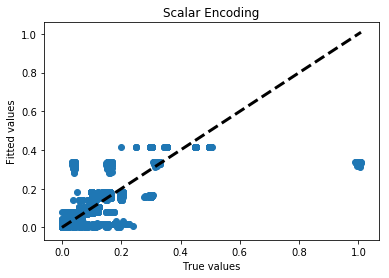

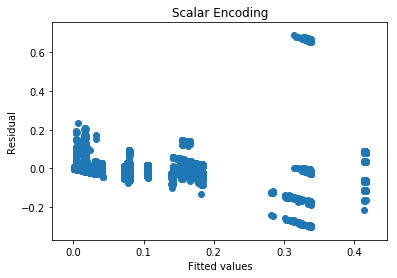

The average Training RMSE is 0.0604
The average Test RMSE is 0.0601
The average Out Of Bag error is 0.3387


In [133]:
# Set the parameters of your model with initial values
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, max_features = 5, bootstrap = True, oob_score = True)

variables = trff_scale_encode[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
backup_size = trff_scale_encode['Size of Backup (GB)']

rmse_testing = list()
rmse_training = list()
oob_error = list()
actual_values = list()
fitted_values = list()
residuals = list()

# Use 10-fold cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in kf.split(trff_scale_encode):
    variables_train, variables_test = variables.iloc[train_index], variables.iloc[test_index]
    backup_size_train, backup_size_test = backup_size.iloc[train_index], backup_size.iloc[test_index]
    
    rf.fit(variables_train, backup_size_train)
    
    # Get the Test RMSE and the predect size of testset
    backup_size_test_pred = rf.predict(variables_test)
    RMSE_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
    rmse_testing.append(RMSE_testing)
    # Get the Training RMSE and the predect size of trainset
    backup_size_train_pred = rf.predict(variables_train)
    RMSE_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
    rmse_training.append(RMSE_training)
    
    oob_error.append((1-rf.oob_score_))
    
    print('The Training RMSE is %.4f' % RMSE_training)
    print('The Test RMSE is %.4f' % RMSE_testing)
    print('The Out Of Bag error is %.4f' % (1-rf.oob_score_))
    print('-'*30)
    
    for i in range(len(backup_size_test)):
        backup_size_test = list(backup_size_test)
        actual_values.append(backup_size_test[i])
        fitted_values.append(backup_size_test_pred[i])
        residuals.append(backup_size_test[i]-backup_size_test_pred[i])
    

actual_values = np.array(actual_values)
fitted_values = np.array(fitted_values)
drawScatterPlots(actual_values, fitted_values, 'Scalar Encoding')

print('The average Training RMSE is %.4f' % np.mean(rmse_training))
print('The average Test RMSE is %.4f' % np.mean(rmse_testing))
print('The average Out Of Bag error is %.4f' % np.mean(oob_error))

ii) Sweep over number of trees from 1 to 200 and maximum number of features
from 1 to 5, plot
1) out-of-bag error (y axis) against number of trees (x axis)
2) average test-RMSE (y axis) against number of trees (x axis)

In [13]:
def randomforest(trees_num, features_num, depth):
    rf = RandomForestRegressor(n_estimators = trees_num, max_depth = depth, max_features = features_num, bootstrap = True, oob_score = True)

    variables = trff_scale_encode[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
    backup_size = trff_scale_encode['Size of Backup (GB)']

    rmse_testing = list()
    rmse_training = list()
    oob_error = list()

    # Use 10-fold cross validation
    kf = KFold(n_splits=10, random_state=42, shuffle=False)
    for train_index, test_index in kf.split(trff_scale_encode):
        variables_train, variables_test = variables.iloc[train_index], variables.iloc[test_index]
        backup_size_train, backup_size_test = backup_size.iloc[train_index], backup_size.iloc[test_index]
    
        rf.fit(variables_train, backup_size_train)
        
        # Get the Test RMSE and the predect size of testset
        backup_size_test_pred = rf.predict(variables_test)
        RMSE_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
        rmse_testing.append(RMSE_testing)
        # Get the Training RMSE and the predect size of trainset
        backup_size_train_pred = rf.predict(variables_train)
        RMSE_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
        rmse_training.append(RMSE_training)
    
        oob_error.append((1-rf.oob_score_))
    
    rmse_train.append(np.mean(rmse_training))
    rmse_test.append(np.mean(rmse_testing))
    oobe_average.append(np.mean(oob_error))

The maximum number of features is 1.000000
140
0.5193763654594519
The maximum number of features is 2.000000
177
0.37815031657124176
The maximum number of features is 3.000000
73
0.3280689933848011
The maximum number of features is 4.000000
136
0.33960185241030394
The maximum number of features is 5.000000
57
0.33468171396527785


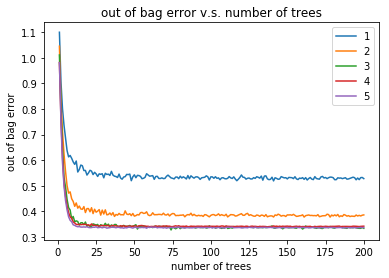

In [17]:
# Plot out-of-bag error (y axis) against number of trees (x axis)
# Sweep over number of trees from 1 to 200 and 
# maximum number of features from 1 to 5
for max_feature in range(1,6):
    print('The maximum number of features is %f'%max_feature)
    rmse_train = list()
    rmse_test = list()
    oobe_average = list()
    
    for trees_num in range(1,201):
        randomforest(trees_num, max_feature, 4)
#         print('The trees_num is %f'%trees_num)
    
    print(oobe_average.index(min(oobe_average)))
    print(min(oobe_average))
    
    plt.plot(range(1,201), oobe_average, label = max_feature)
        
plt.ylabel('out of bag error')
plt.xlabel('number of trees')
plt.title('out of bag error v.s. number of trees')
plt.legend(loc = 'best')

plt.show()

The maximum number of features is 1.000000
46
0.5200296069804097
The maximum number of features is 2.000000
58
0.3762288421414676
The maximum number of features is 3.000000
112
0.33328895338861453
The maximum number of features is 4.000000
57
0.33914802124810317
The maximum number of features is 5.000000
26
0.33429014936996476


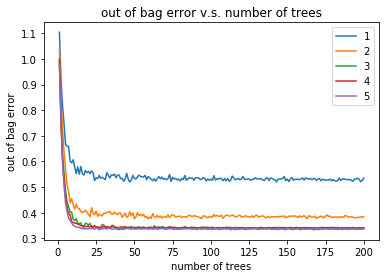

In [18]:
# Plot average test-RMSE (y axis) against number of trees (x axis)
# Sweep over number of trees from 1 to 200 and 
# maximum number of features from 1 to 5
for max_feature in range(1,6):
    print('The maximum number of features is %f'%max_feature)
    rmse_train = list()
    rmse_test = list()
    oobe_average = list()
    
    for trees_num in range(1,201):
        randomforest(trees_num, max_feature, 4)
    
    print(oobe_average.index(min(oobe_average)))
    print(min(oobe_average))
    
    plt.plot(range(1,201), oobe_average, label = max_feature)
        
plt.ylabel('out of bag error')
plt.xlabel('number of trees')
plt.title('Test RMSE v.s. number of trees')
plt.legend(loc = 'best')
plt.show()

iii) Pick another parameter you want to experiment on. Plot similar figure 1
and figure 2 as above. What parameters would you pick to achieve the best
performance?

The maximum depth is 1.000000
36
0.8752731419524518
The maximum depth is 2.000000
33
0.6867492912485055
The maximum depth is 3.000000
22
0.5795276770593109
The maximum depth is 4.000000
69
0.33536788269713186


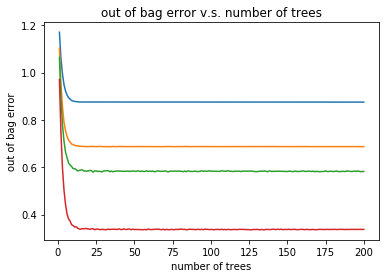

In [23]:
# Plot out-of-bag error (y axis) against depth (x axis)
# Sweep over number of trees from 1 to 200 and 
# maximum depth from 1 to 4
for depth in range(1,5):
    print('The maximum depth is %f'%depth)
    
    rmse_train = list()
    rmse_test = list()
    oobe_average = list()
    
    for trees_num in range(1,201):
        randomforest(trees_num, 5, depth)
#         print('The trees_num is %f'%trees_num)
    print(oobe_average.index(min(oobe_average)))
    print(min(oobe_average))
    
    plt.plot(range(1,201), oobe_average, label = depth)
    
plt.ylabel('out of bag error')
plt.xlabel('number of trees')
plt.title('out of bag error v.s. number of trees')
plt.show()

The maximum depth is 1.000000
3
0.09731610642189377
The maximum depth is 2.000000
5
0.08594926512522723
The maximum depth is 3.000000
15
0.07882772633904289
The maximum depth is 4.000000
41
0.059747384279583815


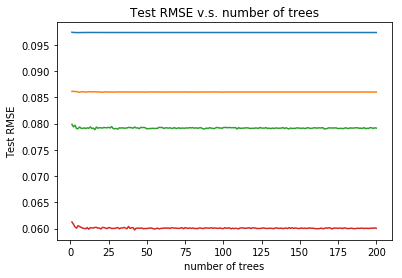

In [28]:
# Plot average test-RMSE (y axis) against depth (x axis)
# Sweep over number of trees from 1 to 200 and 
# maximum depth from 1 to 4
for depth in range(1,5):
    print('The maximum depth is %f'%depth)
    
    rmse_train = list()
    rmse_test = list()
    oobe_average = list()
    
    for trees_num in range(1,201):
        randomforest(trees_num, 5, depth)
    print(rmse_test.index(min(rmse_test)))
    print(min(rmse_test))
    
    plt.plot(range(1,201), rmse_test, label = depth)
    
plt.ylabel('Test RMSE')
plt.xlabel('number of trees')
plt.title('Test RMSE v.s. number of trees')
plt.show()

iv) Report the feature importances you got from the best random forest regression you find.

In [29]:
from sklearn import tree

In [142]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, max_features = 5, bootstrap = True, oob_score = True)

variables = trff_scale_encode[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
backup_size = trff_scale_encode['Size of Backup (GB)']

rf.fit(variables, backup_size)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(variables.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 4 (0.313193)
2. feature 1 (0.277288)
3. feature 3 (0.255949)
4. feature 2 (0.153563)
5. feature 0 (0.000007)


v) Visualize your decision trees. Pick any tree (estimator) in best random forest (with max depth=4) and plot its structure, which is the root node in this decision tree? Is it the most important feature according to the feature
importance reported by the regressor?

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

variables = trff_scale_encode[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
backup_size = trff_scale_encode['Size of Backup (GB)']

rf = RandomForestRegressor(n_estimators = 25, max_features = 4, max_depth = 4,
                          bootstrap = True, oob_score = True)

rf.fit(variables, backup_size)

estimator = rf.estimators_[0]
export_graphviz(estimator, out_file = 'DecisionTree.dot')

### c) Neural Network Regression Model

In [17]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper

In [18]:
enc = OneHotEncoder()
mapper = DataFrameMapper([
    (['Week #'], enc),
    (['Day of Week'], enc),
    (['Backup Start Time - Hour of Day'], enc),
    (['Work-Flow-ID'], enc), 
    (['File Name'], enc),
    (['Size of Backup (GB)'],None),
    (['Backup Time (hour)'],None)])
trff_OH = mapper.fit_transform(trff_scale_encode)
size_index = trff_OH.shape[1]-2

In [19]:
def nn_hidden_test(hidden_size,activation_in,trff_OH,size_index):
    rmse_testing = list()
    rmse_training = list()
    clf = MLPRegressor(activation=activation_in,alpha=0.0001, learning_rate='adaptive', hidden_layer_sizes=(hidden_size,), random_state=42)
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(trff_OH)
    for train_index, test_index in kf.split(trff_OH):
        variables_train, variables_test = trff_OH[train_index,0:size_index], trff_OH[test_index,0:size_index]
        backup_size_train, backup_size_test = trff_OH[train_index,size_index], trff_OH[test_index,size_index]
        clf.fit(variables_train, backup_size_train)
        backup_size_test_pred = clf.predict(variables_test)
        RMSE_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
        rmse_testing.append(RMSE_testing)
        backup_size_train_pred = clf.predict(variables_train)
        RMSE_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
        rmse_training.append(RMSE_training)
    return np.mean(rmse_training),np.mean(rmse_testing)

0.0887312554451929
0.059752402190035005
0.019275735714761138
0.019303236677476663
0.020047552354946277
0.019226661759243462
0.01882545029514552
0.01871858418873886
0.01830380345361102


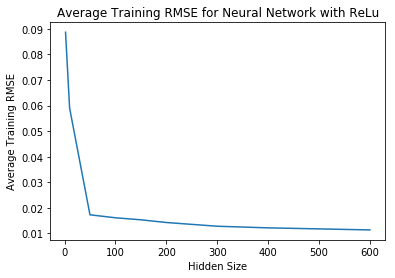

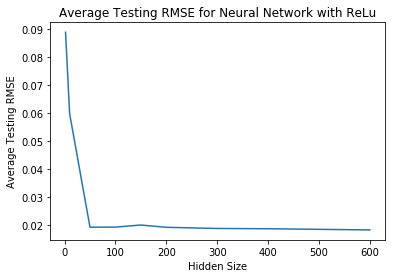

In [98]:
# relu activation function
hidden_sizes = [2,10,50,100,150,200,300,400,600]
#hidden_sizes = [10,20,50]
rmse_train_average = []
rmse_test_average = []

hdl1_1 = plt.figure()
ax1_1 = hdl1_1.add_subplot(111)  
plt.xlabel('Hidden Size')
plt.ylabel('Average Training RMSE')
plt.title('Average Training RMSE for Neural Network with ReLu')

hdl1 = plt.figure()
ax1 = hdl1.add_subplot(111)
plt.xlabel('Hidden Size')
plt.ylabel('Average Testing RMSE')
plt.title('Average Testing RMSE for Neural Network with ReLu')

for hidden_size in hidden_sizes:
    temp_average_train,temp_average_test = nn_hidden_test(hidden_size,'relu',trff_OH,size_index)
    print(temp_average_test)
    rmse_train_average.append(temp_average_train)
    rmse_test_average.append(temp_average_test)
ax1_1.plot(hidden_sizes,rmse_train_average)


ax1.plot(hidden_sizes,rmse_test_average)


0.08808656059756455
0.08819277869896636
0.08846902520101105
0.08938551757341792
0.08897626588757429
0.08923785188067554
0.09039919778702594
0.08964076164706221
0.09077998519308428


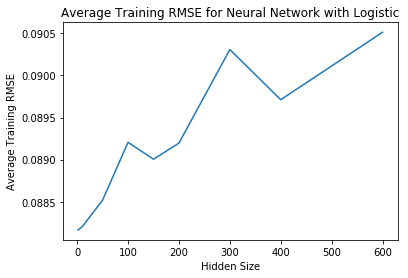

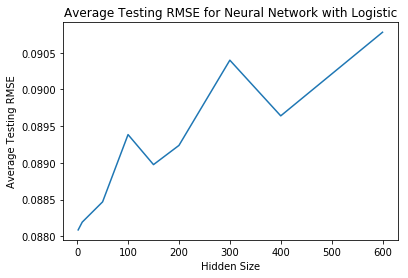

In [100]:
# logistic activation function
hidden_sizes = [2,10,50,100,150,200,300,400,600]
rmse_train_average = []
rmse_test_average = []

hdl1_1 = plt.figure()
ax1_1 = hdl1_1.add_subplot(111)  
plt.xlabel('Hidden Size')
plt.ylabel('Average Training RMSE')
plt.title('Average Training RMSE for Neural Network with Logistic')

hdl1 = plt.figure()
ax1 = hdl1.add_subplot(111)
plt.xlabel('Hidden Size')
plt.ylabel('Average Testing RMSE')
plt.title('Average Testing RMSE for Neural Network with Logistic')


for hidden_size in hidden_sizes:
    temp_average_train,temp_average_test = nn_hidden_test(hidden_size,'logistic',trff_OH,size_index)
    print(temp_average_test)
    rmse_train_average.append(temp_average_train)
    rmse_test_average.append(temp_average_test)
ax1_1.plot(hidden_sizes,rmse_train_average)
ax1.plot(hidden_sizes,rmse_test_average)


0.08826711286899079
0.08805782899602631
0.04886292500104244
0.03485851500754174
0.027315752901125683
0.03438167611874546
0.027013943536851204
0.03558158148352121
0.07925237177661887


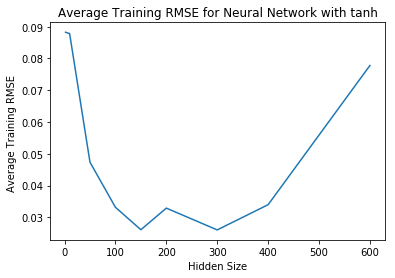

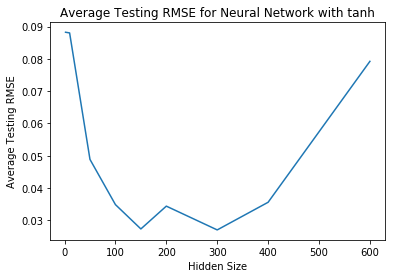

In [101]:
# tanh activation function
hidden_sizes = [2,10,50,100,150,200,300,400,600]
rmse_train_average = []
rmse_test_average = []

hdl1_1 = plt.figure()
ax1_1 = hdl1_1.add_subplot(111)  
plt.xlabel('Hidden Size')
plt.ylabel('Average Training RMSE ')
plt.title('Average Training RMSE for Neural Network with tanh')

hdl1 = plt.figure()
ax1 = hdl1.add_subplot(111)
plt.xlabel('Hidden Size')
plt.ylabel('Average Testing RMSE')
plt.title('Average Testing RMSE for Neural Network with tanh')


for hidden_size in hidden_sizes:
    temp_average_train,temp_average_test = nn_hidden_test(hidden_size,'tanh',trff_OH,size_index)
    print(temp_average_test)
    rmse_train_average.append(temp_average_train)
    rmse_test_average.append(temp_average_test)
ax1.plot(hidden_sizes,rmse_test_average)
ax1_1.plot(hidden_sizes,rmse_train_average)

### d) Predict the Backup size for each of the workflow

i) Using linear regression model. Explain if the fit is improved?

In [23]:
trff_all= pd.read_csv('network_backup_dataset.csv')
trff_scale_encode = trff_all.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                                                      'Friday': 5, 'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26,
                                'File_27': 27, 'File_28': 28, 'File_29': 29, }})

In [24]:
work_flow_0 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==0]
work_flow_1 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==1]
work_flow_2 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==2]
work_flow_3 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==3]
work_flow_4 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==4]

In [134]:
def seperate_check(work_flow_in,model,verbose = True, plot_image=True):
    variables = work_flow_in[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
    backup_size = work_flow_in['Size of Backup (GB)']
    rmse_testing = list()
    rmse_training = list()
    actual_values = list()
    fitted_values = list()
    residuals = list()
    kf = KFold(n_splits=10, random_state=42, shuffle=False)
    for train_index, test_index in kf.split(work_flow_in):
        # Initialize training, testing data, use the current model to fit the training data
        variables_train, variables_test = variables.iloc[train_index], variables.iloc[test_index]
        backup_size_train, backup_size_test = backup_size.iloc[train_index], backup_size.iloc[test_index]
        model.fit(variables_train, backup_size_train)
        # Do prediction using model, get the Test RMSE and the predect size of testset
        backup_size_test_pred = model.predict(variables_test)
        temp_rmse_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
        rmse_testing.append(temp_rmse_testing)
        # Get the Training RMSE and the predect size of trainset
#         print('backup_size_train size:', len(backup_size_train))
        backup_size_train_pred = model.predict(variables_train)
        temp_rmse_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
        rmse_training.append(temp_rmse_training)
    
        for i in range(len(backup_size_test)):
            backup_size_test = list(backup_size_test)
            actual_values.append(backup_size_test[i])
            fitted_values.append(backup_size_test_pred[i])
            residuals.append(backup_size_test[i]-backup_size_test_pred[i])
        if(verbose):
            print('The Training RMSE is %.4f' % temp_rmse_training)
            print('The Testing RMSE is %.4f' % temp_rmse_testing)
            print('-'*30)
    if(plot_image):
            actual_values = np.array(actual_values)
            fitted_values = np.array(fitted_values)
            drawScatterPlots(actual_values, fitted_values, 'Scalar Encoding')
    print('The Average Training RMSE is %.4f' % np.mean(rmse_training))
    print('The Average Testing RMSE is %.4f' % np.mean(rmse_testing))
    return np.mean(rmse_training),np.mean(rmse_testing)

The Training RMSE is 0.0357
The Testing RMSE is 0.0371
------------------------------
The Training RMSE is 0.0359
The Testing RMSE is 0.0349
------------------------------
The Training RMSE is 0.0357
The Testing RMSE is 0.0369
------------------------------
The Training RMSE is 0.0357
The Testing RMSE is 0.0370
------------------------------
The Training RMSE is 0.0358
The Testing RMSE is 0.0364
------------------------------
The Training RMSE is 0.0360
The Testing RMSE is 0.0342
------------------------------
The Training RMSE is 0.0357
The Testing RMSE is 0.0374
------------------------------
The Training RMSE is 0.0360
The Testing RMSE is 0.0342
------------------------------
The Training RMSE is 0.0358
The Testing RMSE is 0.0366
------------------------------
The Training RMSE is 0.0360
The Testing RMSE is 0.0341
------------------------------


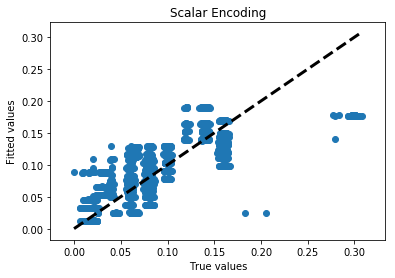

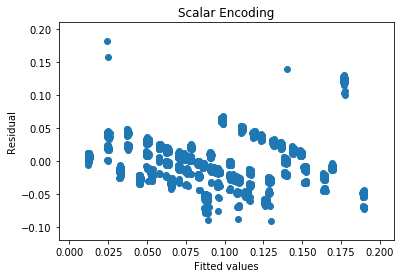

The Average Training RMSE is 0.0358
The Average Testing RMSE is 0.0359


In [135]:
lr = linear_model.LinearRegression()
# Work flow 0:
average_train,average_test = seperate_check(work_flow_0,lr)

The Training RMSE is 0.1462
The Testing RMSE is 0.1704
------------------------------
The Training RMSE is 0.1513
The Testing RMSE is 0.1238
------------------------------
The Training RMSE is 0.1462
The Testing RMSE is 0.1702
------------------------------
The Training RMSE is 0.1513
The Testing RMSE is 0.1237
------------------------------
The Training RMSE is 0.1462
The Testing RMSE is 0.1701
------------------------------
The Training RMSE is 0.1513
The Testing RMSE is 0.1242
------------------------------
The Training RMSE is 0.1462
The Testing RMSE is 0.1704
------------------------------
The Training RMSE is 0.1513
The Testing RMSE is 0.1238
------------------------------
The Training RMSE is 0.1462
The Testing RMSE is 0.1704
------------------------------
The Training RMSE is 0.1513
The Testing RMSE is 0.1239
------------------------------


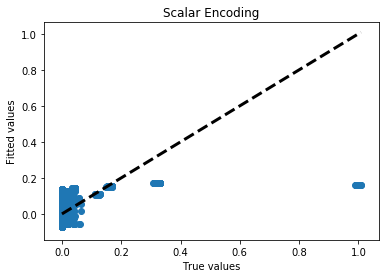

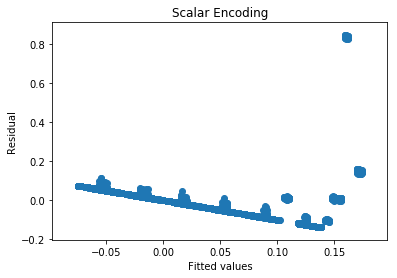

The Average Training RMSE is 0.1487
The Average Testing RMSE is 0.1471


In [136]:
# Work flow 1:
average_train,average_test = seperate_check(work_flow_1,lr)

The Training RMSE is 0.0436
The Testing RMSE is 0.0365
------------------------------
The Training RMSE is 0.0423
The Testing RMSE is 0.0484
------------------------------
The Training RMSE is 0.0437
The Testing RMSE is 0.0356
------------------------------
The Training RMSE is 0.0425
The Testing RMSE is 0.0466
------------------------------
The Training RMSE is 0.0437
The Testing RMSE is 0.0356
------------------------------
The Training RMSE is 0.0417
The Testing RMSE is 0.0528
------------------------------
The Training RMSE is 0.0434
The Testing RMSE is 0.0384
------------------------------
The Training RMSE is 0.0424
The Testing RMSE is 0.0476
------------------------------
The Training RMSE is 0.0437
The Testing RMSE is 0.0355
------------------------------
The Training RMSE is 0.0422
The Testing RMSE is 0.0488
------------------------------


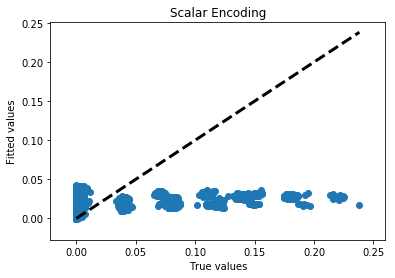

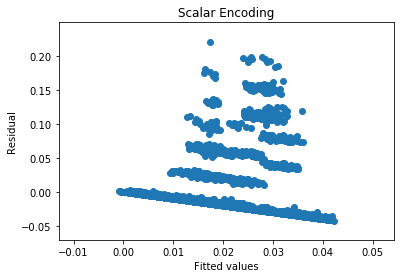

The Average Training RMSE is 0.0429
The Average Testing RMSE is 0.0426


In [137]:
# Work flow 2:
average_train,average_test = seperate_check(work_flow_2,lr)

The Training RMSE is 0.0074
The Testing RMSE is 0.0060
------------------------------
The Training RMSE is 0.0072
The Testing RMSE is 0.0078
------------------------------
The Training RMSE is 0.0073
The Testing RMSE is 0.0064
------------------------------
The Training RMSE is 0.0071
The Testing RMSE is 0.0082
------------------------------
The Training RMSE is 0.0074
The Testing RMSE is 0.0057
------------------------------
The Training RMSE is 0.0071
The Testing RMSE is 0.0083
------------------------------
The Training RMSE is 0.0073
The Testing RMSE is 0.0066
------------------------------
The Training RMSE is 0.0071
The Testing RMSE is 0.0086
------------------------------
The Training RMSE is 0.0073
The Testing RMSE is 0.0063
------------------------------
The Training RMSE is 0.0072
The Testing RMSE is 0.0080
------------------------------


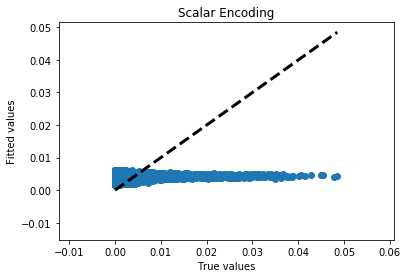

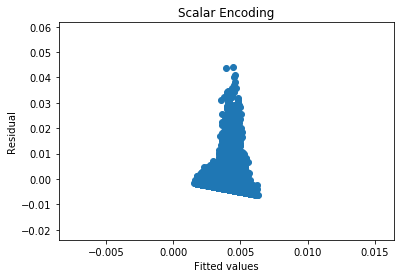

The Average Training RMSE is 0.0072
The Average Testing RMSE is 0.0072


In [138]:
# Work flow 3:
average_train,average_test = seperate_check(work_flow_3,lr)

The Training RMSE is 0.0872
The Testing RMSE is 0.0739
------------------------------
The Training RMSE is 0.0847
The Testing RMSE is 0.0960
------------------------------
The Training RMSE is 0.0871
The Testing RMSE is 0.0745
------------------------------
The Training RMSE is 0.0846
The Testing RMSE is 0.0971
------------------------------
The Training RMSE is 0.0870
The Testing RMSE is 0.0755
------------------------------
The Training RMSE is 0.0849
The Testing RMSE is 0.0946
------------------------------
The Training RMSE is 0.0870
The Testing RMSE is 0.0752
------------------------------
The Training RMSE is 0.0848
The Testing RMSE is 0.0958
------------------------------
The Training RMSE is 0.0871
The Testing RMSE is 0.0749
------------------------------
The Training RMSE is 0.0848
The Testing RMSE is 0.0957
------------------------------


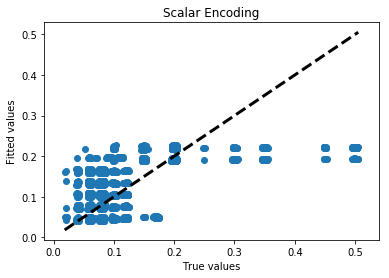

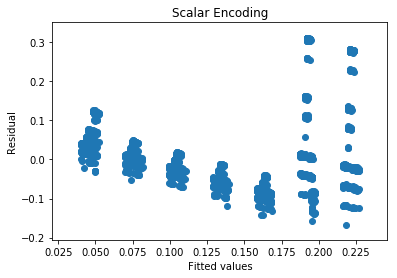

The Average Training RMSE is 0.0859
The Average Testing RMSE is 0.0853


In [139]:
# Work flow 4:
average_train,average_test = seperate_check(work_flow_4,lr)

ii) Try fitting a more complex regression function to your data. Can you find a threshold on the degree of the fitted polynomial beyond which the generalization error of your model gets worse? Can you explain how cross validation helps controlling the complexity of your model?

In [48]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Ploy: 1
The Average Training RMSE is 0.0358
The Average Testing RMSE is 0.0359
Ploy: 2
The Average Training RMSE is 0.0295
The Average Testing RMSE is 0.0295
Ploy: 3
The Average Training RMSE is 0.0263
The Average Testing RMSE is 0.0263
Ploy: 4
The Average Training RMSE is 0.0250
The Average Testing RMSE is 0.0251
Ploy: 5
The Average Training RMSE is 0.0182
The Average Testing RMSE is 0.0187
Ploy: 6
The Average Training RMSE is 0.0104
The Average Testing RMSE is 0.0124
Ploy: 7
The Average Training RMSE is 0.0091
The Average Testing RMSE is 0.0114
Ploy: 8
The Average Training RMSE is 0.0079
The Average Testing RMSE is 0.0142
Ploy: 9
The Average Training RMSE is 0.0076
The Average Testing RMSE is 0.0173
Ploy: 10
The Average Training RMSE is 0.0073
The Average Testing RMSE is 0.0307
Ploy: 11
The Average Training RMSE is 0.0119
The Average Testing RMSE is 0.0602
Ploy: 12
The Average Training RMSE is 0.0166
The Average Testing RMSE is 0.2052


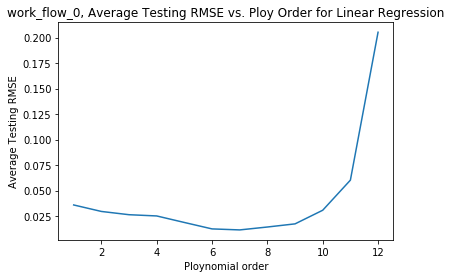

In [104]:
# Work flow 0:
poly_input = [1,2,3,4,5,6,7, 8, 9,10,11,12]
lr = linear_model.LinearRegression()
test_rmse_average_0 = []
train_rmse_average_0 = []
for i in poly_input:
    print('Ploy:', i)
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_0,model_in,verbose=False,plot_image=False)
    train_rmse_average_0.append(temp_train)
    test_rmse_average_0.append(temp_test)
# work_flow_0 testing RMSE
plt.plot(poly_input,test_rmse_average_0)
plt.ylabel('Average Testing RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_0, Average Testing RMSE vs. Ploy Order for Linear Regression')
plt.show()

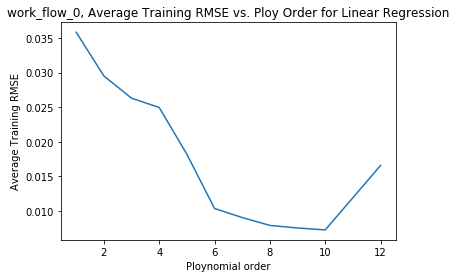

In [105]:
# work_flow_0 Training RMSE
plt.plot(poly_input,train_rmse_average_0)
plt.ylabel('Average Training RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_0, Average Training RMSE vs. Ploy Order for Linear Regression')
plt.show()

Ploy order: 1
The Average Training RMSE is 0.1487
The Average Testing RMSE is 0.1471
Ploy order: 2
The Average Training RMSE is 0.1298
The Average Testing RMSE is 0.1286
Ploy order: 3
The Average Training RMSE is 0.1129
The Average Testing RMSE is 0.1133
Ploy order: 4
The Average Training RMSE is 0.0896
The Average Testing RMSE is 0.0898
Ploy order: 5
The Average Training RMSE is 0.0665
The Average Testing RMSE is 0.0670
Ploy order: 6
The Average Training RMSE is 0.0425
The Average Testing RMSE is 0.0428
Ploy order: 7
The Average Training RMSE is 0.0208
The Average Testing RMSE is 0.0224
Ploy order: 8
The Average Training RMSE is 0.0081
The Average Testing RMSE is 0.0131
Ploy order: 9
The Average Training RMSE is 0.0054
The Average Testing RMSE is 0.0112
Ploy order: 10
The Average Training RMSE is 0.0052
The Average Testing RMSE is 0.0247
Ploy order: 11
The Average Training RMSE is 0.0051
The Average Testing RMSE is 0.0352
Ploy order: 12
The Average Training RMSE is 0.0052
The Average 

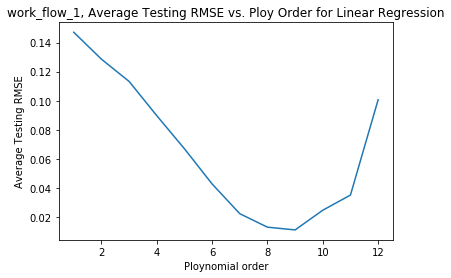

In [88]:
# Work flow 1:
poly_input = [1,2,3,4,5,6,7,8,9,10,11,12]
test_rmse_average_1 = []
train_rmse_average_1 = []
for i in poly_input:
    print('Ploy order:', i)
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_1,model_in,verbose=False,plot_image=False)
    train_rmse_average_1.append(temp_train)
    test_rmse_average_1.append(temp_test)
# work_flow_1 testing RMSE
plt.plot(poly_input,test_rmse_average_1)
plt.ylabel('Average Testing RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_1, Average Testing RMSE vs. Ploy Order for Linear Regression')
plt.show()

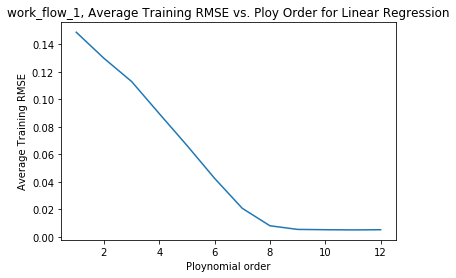

In [89]:
# work_flow_1 training RMSE
plt.plot(poly_input,train_rmse_average_1)
plt.ylabel('Average Training RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_1, Average Training RMSE vs. Ploy Order for Linear Regression')
plt.show()

Ploy order: 1
The Average Training RMSE is 0.0429
The Average Testing RMSE is 0.0426
Ploy order: 2
The Average Training RMSE is 0.0385
The Average Testing RMSE is 0.0386
Ploy order: 3
The Average Training RMSE is 0.0346
The Average Testing RMSE is 0.0348
Ploy order: 4
The Average Training RMSE is 0.0319
The Average Testing RMSE is 0.0328
Ploy order: 5
The Average Training RMSE is 0.0264
The Average Testing RMSE is 0.0276
Ploy order: 6
The Average Training RMSE is 0.0219
The Average Testing RMSE is 0.0250
Ploy order: 7
The Average Training RMSE is 0.0209
The Average Testing RMSE is 0.0285
Ploy order: 8
The Average Training RMSE is 0.0193
The Average Testing RMSE is 0.0330
Ploy order: 9
The Average Training RMSE is 0.0179
The Average Testing RMSE is 0.0436
Ploy order: 10
The Average Training RMSE is 0.0172
The Average Testing RMSE is 0.0734
Ploy order: 12
The Average Training RMSE is 0.0159
The Average Testing RMSE is 0.4604


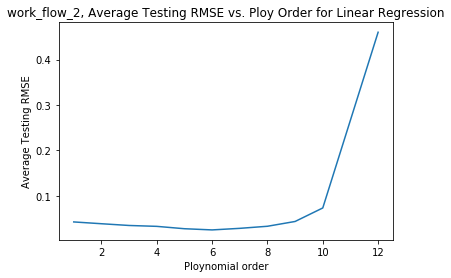

In [90]:
# Work flow 2:
poly_input = [1,2,3,4,5,6,7,8,9,10,12]
test_rmse_average_2 = []
train_rmse_average_2 = []
for i in poly_input:
    print('Ploy order:', i)
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_2,model_in,verbose=False,plot_image=False)
    train_rmse_average_2.append(temp_train)
    test_rmse_average_2.append(temp_test)
# work_flow_2 testing RMSE
plt.plot(poly_input,test_rmse_average_2)
plt.ylabel('Average Testing RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_2, Average Testing RMSE vs. Ploy Order for Linear Regression')
plt.show()

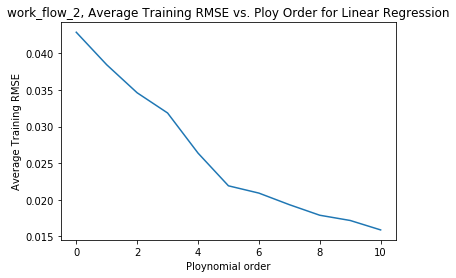

In [91]:
# work_flow_2 training RMSE
plt.plot(train_rmse_average_2)
plt.ylabel('Average Training RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_2, Average Training RMSE vs. Ploy Order for Linear Regression')
plt.show()

Ploy order: 1
The Average Training RMSE is 0.0072
The Average Testing RMSE is 0.0072
Ploy order: 2
The Average Training RMSE is 0.0064
The Average Testing RMSE is 0.0064
Ploy order: 3
The Average Training RMSE is 0.0060
The Average Testing RMSE is 0.0060
Ploy order: 4
The Average Training RMSE is 0.0055
The Average Testing RMSE is 0.0057
Ploy order: 5
The Average Training RMSE is 0.0049
The Average Testing RMSE is 0.0050
Ploy order: 6
The Average Training RMSE is 0.0046
The Average Testing RMSE is 0.0054
Ploy order: 7
The Average Training RMSE is 0.0046
The Average Testing RMSE is 0.0079
Ploy order: 8
The Average Training RMSE is 0.0043
The Average Testing RMSE is 0.0081
Ploy order: 9
The Average Training RMSE is 0.0043
The Average Testing RMSE is 0.0161
Ploy order: 10
The Average Training RMSE is 0.0042
The Average Testing RMSE is 0.0315
Ploy order: 12
The Average Training RMSE is 0.0037
The Average Testing RMSE is 0.0804


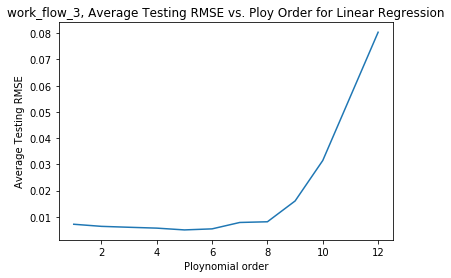

In [92]:
# Work flow 3:
poly_input = [1,2,3,4,5,6,7,8,9,10,12]
test_rmse_average_3 = []
train_rmse_average_3 = []
for i in poly_input:
    print('Ploy order:', i)
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_3,model_in,verbose=False,plot_image=False)
    train_rmse_average_3.append(temp_train)
    test_rmse_average_3.append(temp_test)
    
plt.plot(poly_input,test_rmse_average_3)
plt.ylabel('Average Testing RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_3, Average Testing RMSE vs. Ploy Order for Linear Regression')
plt.show()

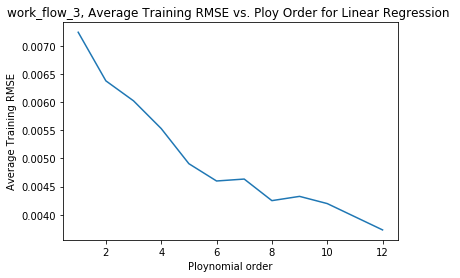

In [93]:
# work_flow_3 training RMSE
plt.plot(poly_input,train_rmse_average_3)
plt.ylabel('Average Training RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_3, Average Training RMSE vs. Ploy Order for Linear Regression ')
plt.show()

Ploy order: 1
The Average Training RMSE is 0.0859
The Average Testing RMSE is 0.0853
Ploy order: 2
The Average Training RMSE is 0.0692
The Average Testing RMSE is 0.0688
Ploy order: 3
The Average Training RMSE is 0.0687
The Average Testing RMSE is 0.0739
Ploy order: 4
The Average Training RMSE is 0.0588
The Average Testing RMSE is 0.0645
Ploy order: 5
The Average Training RMSE is 0.0449
The Average Testing RMSE is 0.0518
Ploy order: 6
The Average Training RMSE is 0.0365
The Average Testing RMSE is 0.0684
Ploy order: 7
The Average Training RMSE is 0.0292
The Average Testing RMSE is 0.0600
Ploy order: 8
The Average Training RMSE is 0.0218
The Average Testing RMSE is 0.0639
Ploy order: 9
The Average Training RMSE is 0.0223
The Average Testing RMSE is 0.0949
Ploy order: 10
The Average Training RMSE is 0.0162
The Average Testing RMSE is 0.0910
Ploy order: 12
The Average Training RMSE is 0.0134
The Average Testing RMSE is 0.6176


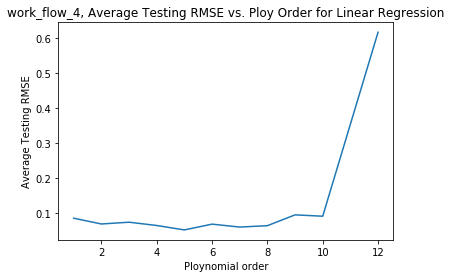

In [94]:
# Work flow 4:
poly_input = [1,2,3,4,5,6,7,8,9,10,12]
test_rmse_average_4 = []
train_rmse_average_4 = []
for i in poly_input:
    print('Ploy order:', i)
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_4,model_in,verbose=False,plot_image=False)
    train_rmse_average_4.append(temp_train)
    test_rmse_average_4.append(temp_test)
plt.plot(poly_input,test_rmse_average_4)
plt.ylabel('Average Testing RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_4, Average Testing RMSE vs. Ploy Order for Linear Regression')
plt.show()

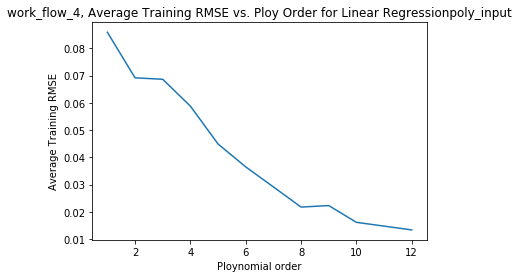

In [95]:
# work_flow_4 training RMSE
plt.plot(poly_input,train_rmse_average_4)
plt.ylabel('Average Training RMSE')
plt.xlabel('Ploynomial order')
plt.title('work_flow_4, Average Training RMSE vs. Ploy Order for Linear Regressionpoly_input')
plt.show()

The Training RMSE is 0.0115
The Testing RMSE is 20.3555
------------------------------
The Training RMSE is 0.0122
The Testing RMSE is 1.8045
------------------------------
The Training RMSE is 0.0137
The Testing RMSE is 0.0815
------------------------------
The Training RMSE is 0.0107
The Testing RMSE is 0.0406
------------------------------
The Training RMSE is 0.0126
The Testing RMSE is 0.0235
------------------------------
The Training RMSE is 0.0112
The Testing RMSE is 0.0273
------------------------------
The Training RMSE is 0.0134
The Testing RMSE is 0.0313
------------------------------
The Training RMSE is 0.0113
The Testing RMSE is 0.1404
------------------------------
The Training RMSE is 0.0112
The Testing RMSE is 2.1711
------------------------------
The Training RMSE is 0.0118
The Testing RMSE is 65.8657
------------------------------


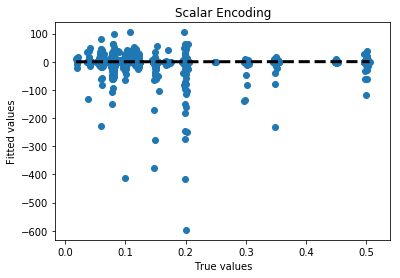

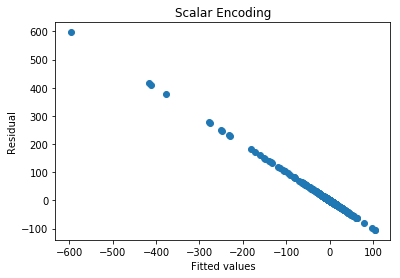

The Average Training RMSE is 0.0119
The Average Testing RMSE is 9.0541


(0.011940509110312447, 9.054145241375226)

In [140]:
# An example with polynomial degree = 18
ply = PolynomialFeatures(18)
model_in = make_pipeline(ply,lr)
seperate_check(work_flow_4,model_in)

### e) k-nearest neighbor regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor

k: 1
The Average Training RMSE is 0.0000
The Average Testing RMSE is 0.0201
k: 2
The Average Training RMSE is 0.0289
The Average Testing RMSE is 0.0335
k: 3
The Average Training RMSE is 0.0300
The Average Testing RMSE is 0.0359
k: 4
The Average Training RMSE is 0.0284
The Average Testing RMSE is 0.0371
k: 5
The Average Training RMSE is 0.0270
The Average Testing RMSE is 0.0427
k: 6
The Average Training RMSE is 0.0284
The Average Testing RMSE is 0.0472
k: 7
The Average Training RMSE is 0.0324
The Average Testing RMSE is 0.0462
k: 8
The Average Training RMSE is 0.0363
The Average Testing RMSE is 0.0462
k: 9
The Average Training RMSE is 0.0394
The Average Testing RMSE is 0.0474
k: 10
The Average Training RMSE is 0.0414
The Average Testing RMSE is 0.0479
k: 20
The Average Training RMSE is 0.0523
The Average Testing RMSE is 0.0536
k: 50
The Average Training RMSE is 0.0632
The Average Testing RMSE is 0.0650
k: 70
The Average Training RMSE is 0.0670
The Average Testing RMSE is 0.0682
k: 100
T

Text(0.5, 1.0, 'Average Training RMSE vs. k Parameter for knn')

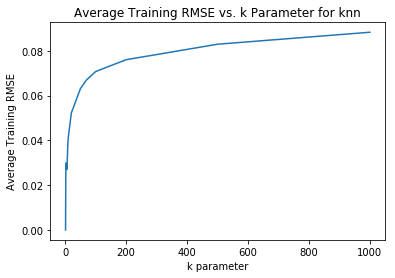

In [107]:
knn_k = [1,2,3,4,5,6,7,8,9,10,20,50,70,100,200,500,1000]
train_rmse_average_knn=[]
test_rmse_average_knn = []
for i in knn_k:
    print('k:', i)
    knn_f = KNeighborsRegressor(n_neighbors=i)
    temp_train,temp_test = seperate_check(trff_scale_encode,knn_f,verbose=False,plot_image=False)
    train_rmse_average_knn.append(temp_train)
    test_rmse_average_knn.append(temp_test)
plt.plot(knn_k, train_rmse_average_knn)
plt.ylabel('Average Training RMSE')
plt.xlabel('k parameter')
plt.title('Average Training RMSE vs. k Parameter for knn')

Text(0.5, 1.0, 'Average Testing RMSE vs. k Parameter for knn')

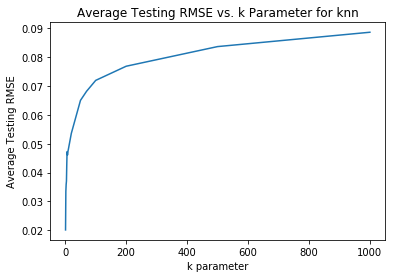

In [108]:
plt.plot(knn_k, test_rmse_average_knn)
plt.ylabel('Average Testing RMSE')
plt.xlabel('k parameter')
plt.title('Average Testing RMSE vs. k Parameter for knn')